# Building a Logistic Regression

Create a logistic regression based on the bank data provided. 

The data is based on the marketing campaign efforts of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Note that the first column of the dataset is the index.

Source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014


## Import the relevant libraries

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

Load the ‘Example_bank_data.csv’ dataset.

In [17]:
raw_data=pd.read_csv("Example-bank-data.csv")
raw_data.head()

,Unnamed: 0,duration,y
0,0,117,no
1,1,274,yes
2,2,167,no
3,3,686,yes
4,4,157,no


We want to know whether the bank marketing strategy was successful, so we need to transform the outcome variable into 0s and 1s in order to perform a logistic regression.

In [18]:
raw_data["y"]=raw_data["y"].map({"no":0, "yes":1})

In [19]:
raw_data.head()

,Unnamed: 0,duration,y
0,0,117,0
1,1,274,1
2,2,167,0
3,3,686,1
4,4,157,0


In [20]:
raw_data=raw_data.rename(columns={"Unnamed":"Index","y":"Exito"})
raw_data.head()

,Unnamed: 0,duration,Exito
0,0,117,0
1,1,274,1
2,2,167,0
3,3,686,1
4,4,157,0


### Declare the dependent and independent variables

In [ ]:
x= raw_data["duration"]
x_const=sm.add_constant(x)
x_const


,const,duration
0,1.0,117
1,1.0,274
2,1.0,167
3,1.0,686
4,1.0,157
...,...,...
513,1.0,204
514,1.0,806
515,1.0,290
516,1.0,473


In [39]:
x.describe(include="all")

count     518.000000
mean      382.177606
std       344.295990
min         9.000000
25%       155.000000
50%       266.500000
75%       482.750000
max      2653.000000
Name: duration, dtype: float64

In [40]:
y=raw_data["Exito"]

### Simple Logistic Regression

Run the regression and visualize it on a scatter plot (no need to plot the line).

In [41]:
#Definiendo el modelo de regresion logística deseado, le digo que genere un modelo de regresion logistica tomando en cuenta el cociende de odds. Hasta el momento no 
#se ha optimizado para encontrar los parametros deseados
reg_log_mod=sm.Logit(y,x_const)
reg_log_mod

In [43]:
#Optimizar el modelo por medio de estadistica para encontar los parametros mas optimos 
res_reg_log=reg_log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


In [76]:
res_reg_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Exito   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Mon, 06 Oct 2025   Pseudo R-squ.:                  0.2121
Time:                        16:01:31   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

In [45]:
res_reg_log.params

const      -1.700110
duration    0.005112
dtype: float64

In [46]:
b0=res_reg_log.params[0]
b1=res_reg_log.params[1]

C:\Users\CHOPPE\AppData\Local\Temp\ipykernel_27160\662050382.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b0=res_reg_log.params[0]
C:\Users\CHOPPE\AppData\Local\Temp\ipykernel_27160\662050382.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b1=res_reg_log.params[1]


In [74]:
def array_reg_log(x,b0,b1):
    return np.exp(b0+b1*x)/(1+np.exp(b0+b1*x))

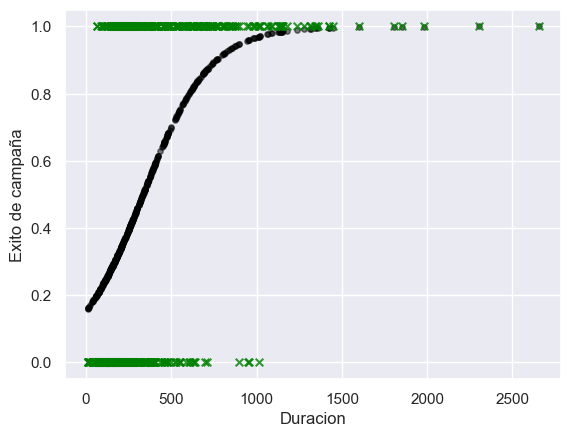

In [75]:
#Generar el array de resultados para cada X_constant y luego comparar los resultados siguiendo la ecuacion matematica vs los datos reales todo en un mismo plot
resultados_modelo=array_reg_log(x,b0,b1)
resultados_modelo_sorted=np.sort(resultados_modelo)
x_sorted=np.sort(x)

plt.scatter(x_sorted, resultados_modelo_sorted, s=15, marker="o", color="black", alpha=0.5)
plt.scatter(x, y, s=30, marker="x", color="green", alpha=0.8)
plt.xlabel("Duracion")
plt.ylabel("Exito de campaña")
plt.show()


